In [1]:
import synthx as sx

### with intervention effect

In [2]:
df = sx.sample(
    n_units=200,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=2,
    intervention_units=[1, 2],
    intervention_time=40,
    intervention_effect=1.03,
    noise_effect=0.1,
    scale=2000,
    seed=42,
)

In [3]:
dataset = sx.Dataset(
    df,
    unit_column='unit',
    time_column='time',
    y_column='y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=[1, 2],
    intervention_time=40,
    validation_time=35,
)

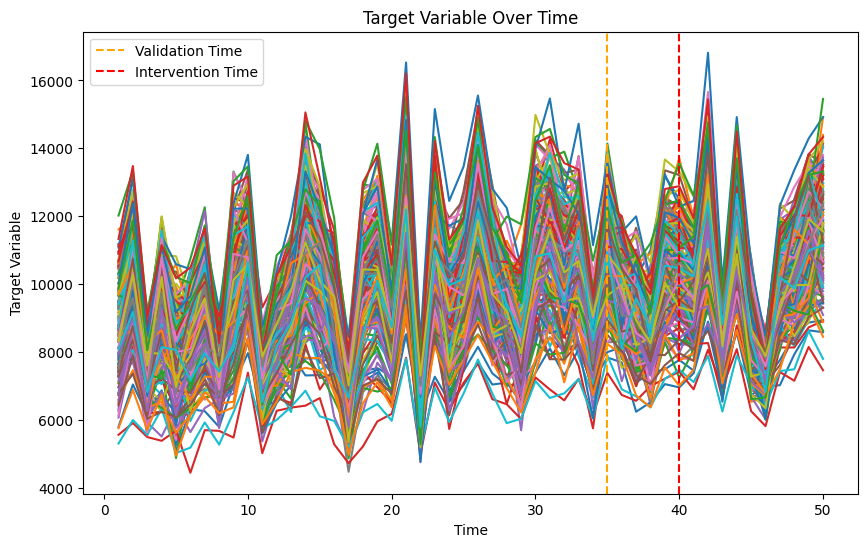

In [4]:
dataset.plot()

In [5]:
sc = sx.synthetic_control(dataset)

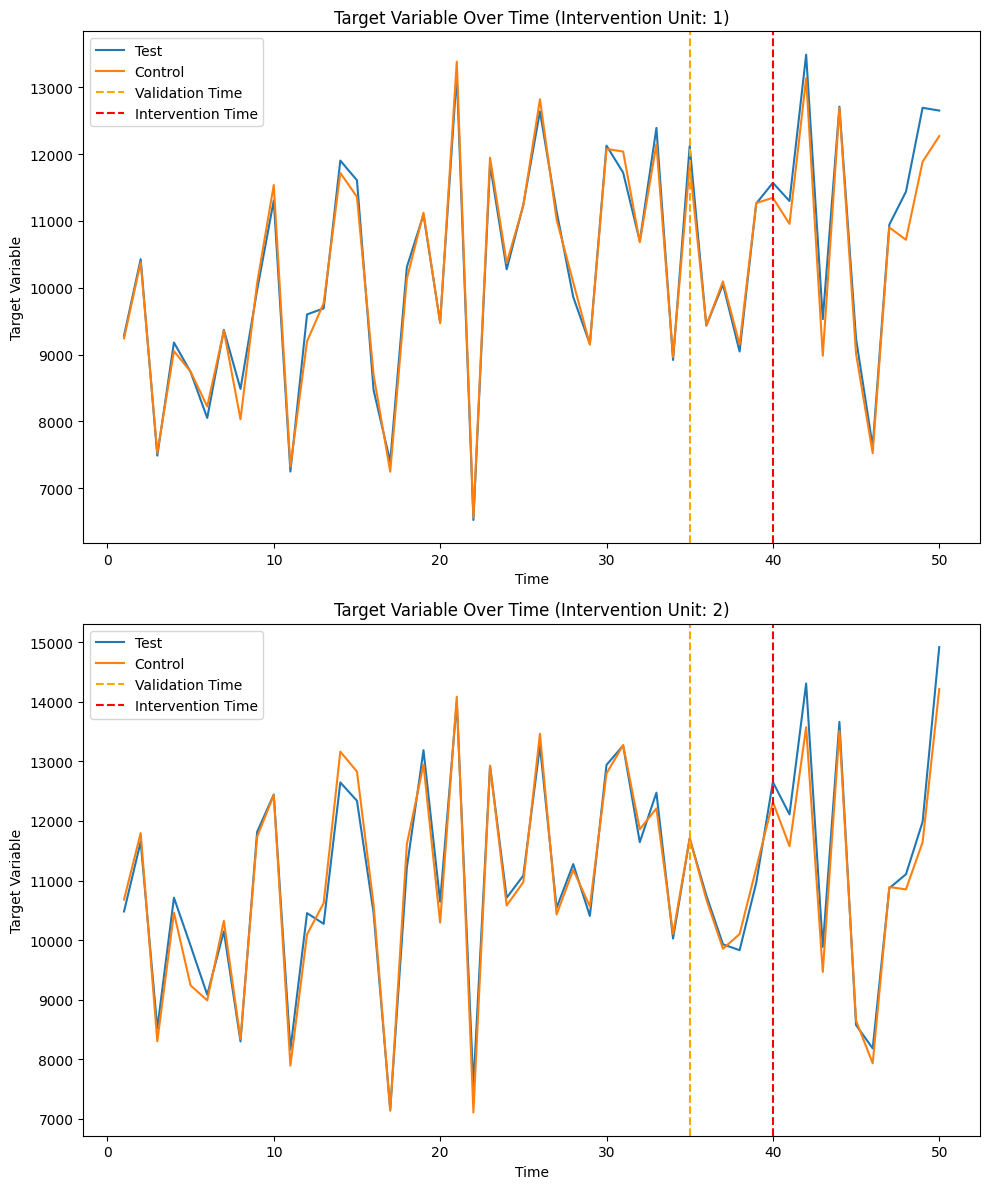

In [6]:
sc.plot()

In [7]:
sc.estimate_effects()

[0.033621898430412744, 0.028533503057424876]

In [8]:
sc.validation_differences()

[0.0019049532928764729, -0.008634169098385455]

In [9]:
sc.paired_ttest()

[{'intervention_unit': 1,
  'p_value_in_training': 0.8724084122033753,
  'p_value_in_intervention': 0.0014711122652544153,
  'p_value': 0.019332447893658178},
 {'intervention_unit': 2,
  'p_value_in_training': 0.681443342530931,
  'p_value_in_intervention': 0.001801290099003797,
  'p_value': 0.060464563265374076}]

### without intervention effect

In [10]:
df = sx.sample(
    n_units=200,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=2,
    intervention_units=[1, 2],
    intervention_time=40,
    intervention_effect=1,
    noise_effect=0.1,
    scale=2000,
    seed=42,
)

In [11]:
dataset = sx.Dataset(
    df,
    unit_column='unit',
    time_column='time',
    y_column='y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=[1, 2],
    intervention_time=40,
    validation_time=35,
)

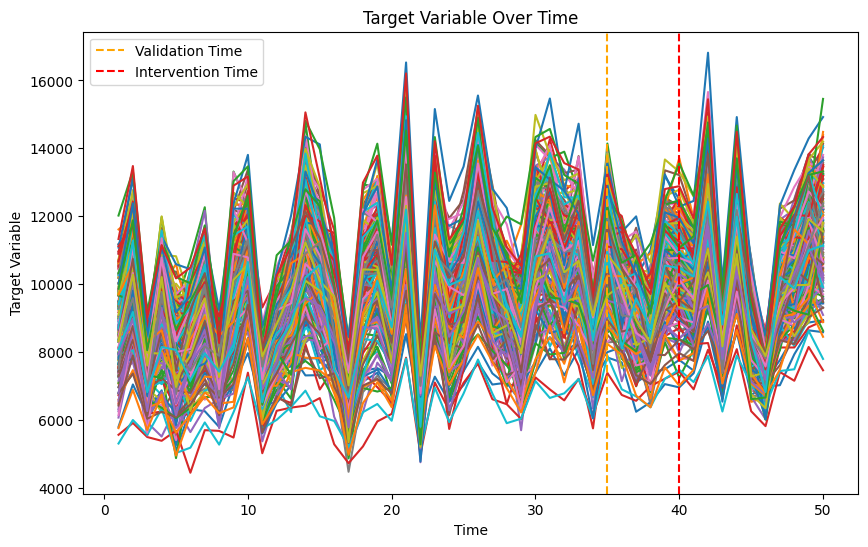

In [12]:
dataset.plot()

In [13]:
sc = sx.synthetic_control(dataset)

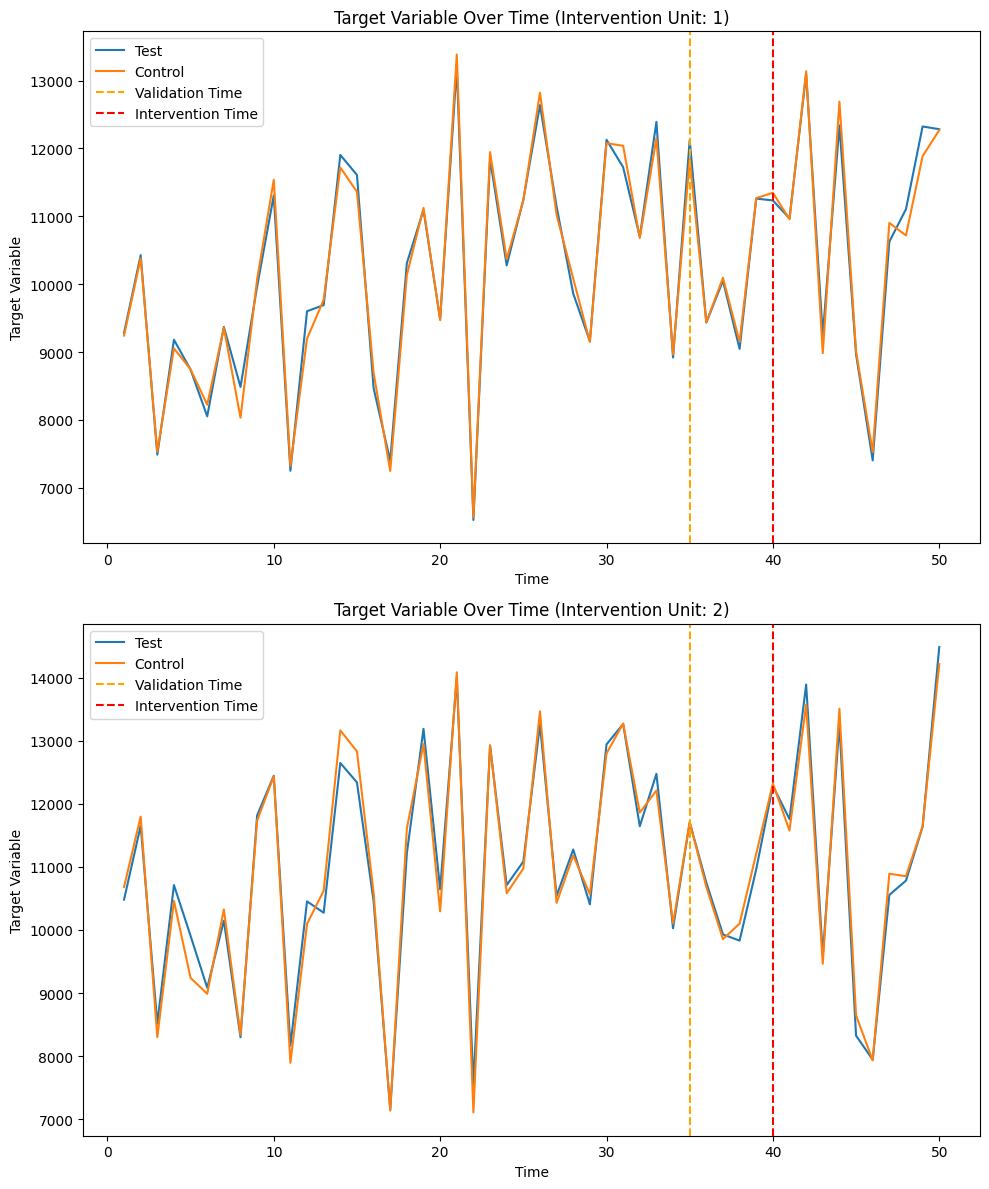

In [14]:
sc.plot()

In [15]:
sc.estimate_effects()

[0.0010870020577165354, -0.002531451025937579]

In [16]:
sc.validation_differences()

[0.0019049532928764729, -0.008634169098385455]

In [17]:
sc.paired_ttest()

[{'intervention_unit': 1,
  'p_value_in_training': 0.8724084122033753,
  'p_value_in_intervention': 0.840771865841651,
  'p_value': 0.7324805497756973},
 {'intervention_unit': 2,
  'p_value_in_training': 0.681443342530931,
  'p_value_in_intervention': 0.897431576665844,
  'p_value': 0.9269691907896946}]